<div style="padding:15px 20px 20px 20px;border-left:3px solid #87CEFA;background-color:#f0fbff;border-radius: 20px;color:#424242;">

# **Notebook Description**

## Table of Contents
- **1. Setup**
    - 1.1) Local Setup
    - 1.2) Downloading the Data

- **2. Channel Dataset Analysis**
    - 2.1) 
    - 2.2) 

- **3. Time Series Dataset Analysis**
    - 3.1) 
    - 3.2) 

- **4. Video Metadata Dataset Analysis**
    - 4.1) 
    - 4.2) 

- **5. Comment Dataset Analysis**
    - 5.1) 
    - 5.2) 

- **6.**

</div>


# **1. Setup**

## 1.1) Local Setup

In [16]:
# !pip install -r pip_requirements.txt

In [46]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

## 1.2) Downloading the Data

In [19]:
# Download the datasets (ordered by size), comment out the ones you don't need 
datasets = [
    # ("https://zenodo.org/records/4650046/files/_raw_df_channels.tsv.gz?download=1", "channels.tsv.gz"), # 6.0 MB
    # ("https://zenodo.org/records/4650046/files/_raw_df_timeseries.tsv.gz?download=1", "time_series.tsv.gz" ), # 571.1 MB
    # ("https://zenodo.org/records/4650046/files/num_comments.tsv.gz?download=1", "num_comments.tsv.gz"), # 754.6 MB
    # ("https://zenodo.org/records/4650046/files/num_comments_authors.tsv.gz?download=1", "num_comments_authors.tsv.gz"), # 1.4 GB
    # ("https://zenodo.org/records/4650046/files/yt_metadata_en.jsonl.gz?download=1", "yt_metadata.jsonl.gz"), # 13.6 GB
    # ("https://zenodo.org/records/4650046/files/youtube_comments.tsv.gz?download=1", "youtube_comments.tsv.gz") # 77.2 GB
]

data_utils.get_data(datasets)
DATA_PATH = os.path.join(ROOT_PATH, "data")

# 2. Channel Dataset Analysis

In [20]:
df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
df_channels.head(3)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087


In [21]:
# For each category, save the channels in a separate file 
data_utils.save_data_grouped_by_category(df_channels, column="category_cc", output_dir=CHANNELS_PATH, overwrite=False)

File 'D:\ADA Project (SSD)\data\channels\Autos & Vehicles.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Comedy.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Education.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Entertainment.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Film and Animation.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Gaming.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Howto & Style.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Music.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\News & Politics.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\Nonprofits & Activism.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\channels\People & Blogs.tsv.gz' already exists. Skipping...
File '

# 3. Time Series Dataset Analysis

In [22]:
time_series = pd.read_csv(f"{DATA_PATH}/time_series.tsv.gz", sep="\t", compression="gzip")
time_series.head(3)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,394085.666667,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,835393.750000,441308.083333,1501.500000,455.500000,6,0,1


In [23]:
# For each category, save the time series in a separate file
data_utils.save_data_grouped_by_category(time_series, column="category", output_dir=TIME_SERIES_PATH, overwrite=False)

File 'D:\ADA Project (SSD)\data\time_series\Autos & Vehicles.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Comedy.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Education.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Entertainment.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Film and Animation.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Gaming.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Howto & Style.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Music.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\News & Politics.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\Nonprofits & Activism.tsv.gz' already exists. Skipping...
File 'D:\ADA Project (SSD)\data\time_series\People & Blogs.tsv.gz' a

## 3.1) Example of Time Series Data: "The evolution of Taylor Swift's channel"

Let's focus on the `Music` category and Taylor Swift's channel. First, since we only have access to the channel ids (via the `channel` column), we need to merge the channel ids with the channel names available in the `df_channels` dataset under the `name_cc` column.

In [62]:
category = "Music"
df_music_time_series = pd.read_csv(f"{TIME_SERIES_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_channels = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')

# Add the channel names to the time series dataset by merging the two datasets
df_music_time_series = data_utils.merge_channel_name(df_music_time_series, df_music_channels, subscriber_rank=True)

In [63]:
df_music_time_series[["channel", "name_cc", "delta_views"]].sample(3)

,channel,name_cc,delta_views
3358593,UC_TF0o9fX25CW7ka6W7U11A,Hippocampe Fou,89559.937500
2224598,UC8g0oVZqXy9Ydhqn-ZbX7Wg,Eon,20024.111111
1385840,UCZzKayG4T5pUPlEjeCmw5Lw,FREEBAND GOD,243773.250000


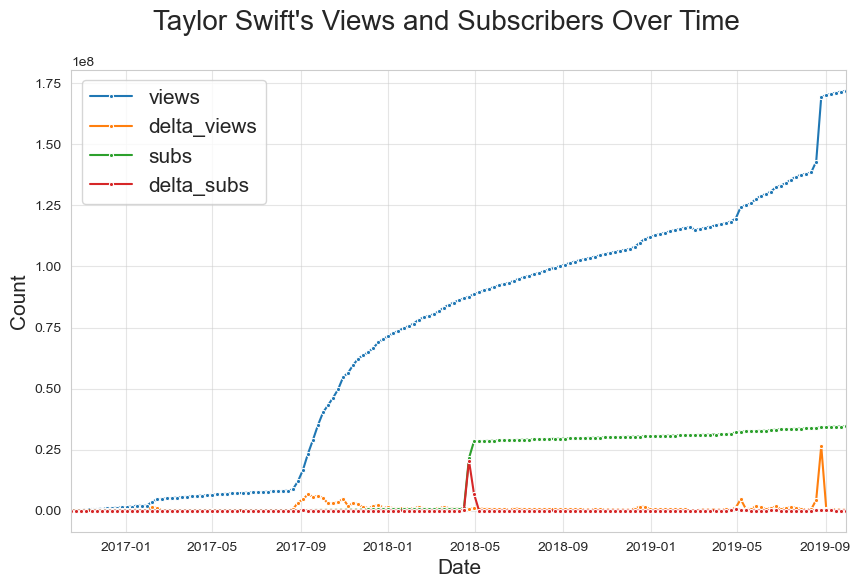

In [76]:
df_taylor_swift = df_music_time_series.query("name_cc == 'Taylor Swift'")
data_utils.plot_channel_time_series(df=df_taylor_swift,
                                    datetime_col="datetime", 
                                    quantities_to_plot=["views", "delta_views", "subs", "delta_subs"], 
                                    title="Taylor Swift's Views and Subscribers Over Time")

# 4. Video Metadata Dataset Analysis

In [39]:
# yt_metadata = pd.read_json(f"{DATA_PATH}/yt_metadata.jsonl.gz", lines=True)
# yt_metadata.head(3)

# 5. Comment Dataset Analysis

In [ ]:
num_comments = pd.read_csv(f"{DATA_PATH}/num_comments.tsv.gz", sep="\t", compression="gzip")
num_comments_authors = pd.read_csv(f"{DATA_PATH}/num_comments_authors.tsv.gz", sep="\t", compression="gzip")
# youtube_comments = pd.read_csv(f"{DATA_PATH}/youtube_comments.tsv.gz", sep="\t", compression="gzip")

# 6. 